**Title: Performance analysis of YouTube Content Types and Content Editor Effectiveness**

**Objective:**

**To determine which sub content type of video is better for which category of content keeping
watch-time as performance metric.**

**To determine which editor have more engagement keeping views as performance metric.**

**To determine which editor is best for editing specific sub content type using ctr as performance metric.**

In [1]:
#Importing libraries
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Reading csv file to DataFrame
df = pd.read_csv("Data/News Dataset.csv", encoding = "latin1", on_bad_lines="skip")

In [3]:
#Observing the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Platform                            824 non-null    object 
 1   Date                                824 non-null    object 
 2   Resource Name                       824 non-null    object 
 3   Category                            821 non-null    object 
 4   Sub Content Type                    824 non-null    object 
 5   Editor (Name)                       824 non-null    object 
 6   Title                               824 non-null    object 
 7   Category of content                 822 non-null    object 
 8   VID IQ SEO SCORE ON UPLOAD          803 non-null    object 
 9   VID IQ SEO SCORE AFTER 24 HOURS     267 non-null    float64
 10  Video/Short                         821 non-null    object 
 11  Video publish time                  821 non-n

In [4]:
df.nunique()

Platform                                5
Date                                   26
Resource Name                          10
Category                                1
Sub Content Type                       11
Editor (Name)                          11
Title                                 732
Category of content                     9
VID IQ SEO SCORE ON UPLOAD             84
VID IQ SEO SCORE AFTER 24 HOURS        25
Video/Short                             4
Video publish time                     19
Comments added                         22
Shares                                 29
Likes (vs dislikes) (%)                68
Dislikes                               22
Likes                                  50
Subscribers lost                       10
Subscribers gained                     21
Average views per viewer              342
Unique viewers                        312
Average percentage viewed (%)         721
Engagement rate (%)                   276
ctr (%)                           

In [5]:
#Setting index
df.set_index(["Category of content", "Sub Content Type"],inplace=True)

In [6]:
#dropping columns with irrelevant imformation to the objective
df.drop(
    columns = [
        "Platform",
        "Date",
        "Resource Name",
        "Category",
        "Video publish time",
        "Title",
        "VID IQ SEO SCORE AFTER 24 HOURS",
        "Likes (vs dislikes) (%)",
        "Impressions click-through rate (%)"
    ],
    inplace=True
)

In [7]:
#Creating watch time in min column
df["Watch time (min)"] = (df["Watch time (hours)"] * 60).round()

In [8]:
#Dropping more column
df.drop(
    columns = [
        "Watch time (hours)",
        "Average views per viewer",
        "Average percentage viewed (%)",
        "Engagement rate (%)",
        "Average view duration"
    ], inplace = True
)

In [9]:
#Cleaning the Dataset
df = df.dropna(how="any")

In [10]:
df["ctr (%)"] = df["ctr (%)"].str.replace("%", "")

In [11]:
#Creating a cleaned dataset
dt = df[["Editor (Name)", "Video/Short"]]
ds = df.drop(columns=["Editor (Name)","Video/Short"]).round().astype(float).astype(int)
yt = pd.concat([dt, ds], axis=1)

In [12]:
yt.head()

Editor (Name)  \
Category of content  Sub Content Type                                
News                 News - Custom with VO          SHAKEEL IRSHAD   
                     News - Custom with VO          SHAKEEL IRSHAD   
                     News - Custom with VO        SHAKEELA PARVEEN   
                     News - Custom with VO        SHAKEELA PARVEEN   
Business and finance News -  Custom with ST + VO  SHAKEELA PARVEEN   

                                                 Video/Short  \
Category of content  Sub Content Type                          
News                 News - Custom with VO             video   
                     News - Custom with VO             video   
                     News - Custom with VO             video   
                     News - Custom with VO             video   
Business and finance News -  Custom with ST + VO       video   

                                                  VID IQ SEO SCORE ON UPLOAD  \
Category of content  Sub Content Type                                          
News                 News - Custom with VO                                45   
                     News - Custom with VO                                45   
                     News - Custom with VO                                45   
                     News - Custom with VO                                45   
Business and finance News -  Custom with ST + VO                          41   

                                                  Comments added  Shares  \
Category of content  Sub Content Type                                      
News                 News - Custom with VO                     0       0   
                     News - Custom with VO                     0       0   
                     News - Custom with VO                     0       0   
                     News - Custom with VO                     0       0   
Business and finance News -  Custom with ST + VO               0       3   

                                                  Dislikes  Likes  \
Category of content  Sub Content Type                               
News                 News - Custom with VO               0      3   
                     News - Custom with VO               0      0   
                     News - Custom with VO               0      2   
                     News - Custom with VO               0      0   
Business and finance News -  Custom with ST + VO         0      2   

                                                  Subscribers lost  \
Category of content  Sub Content Type                                
News                 News - Custom with VO                       0   
                     News - Custom with VO                       0   
                     News - Custom with VO                       0   
                     News - Custom with VO                       0   
Business and finance News -  Custom with ST + VO                 0   

                                                  Subscribers gained  \
Category of content  Sub Content Type                                  
News                 News - Custom with VO                         1   
                     News - Custom with VO                         0   
                     News - Custom with VO                         1   
                     News - Custom with VO                         1   
Business and finance News -  Custom with ST + VO                   1   

                                                  Unique viewers  ctr (%)  \
Category of content  Sub Content Type                                       
News                 News - Custom with VO                    95        6   
                     News - Custom with VO                    58        3   
                     News - Custom with VO                   122        5   
                     News - Custom with VO                    40        3   
Business and finance News -  Custom with ST + VO             129        2   


In [13]:
#Creating my pivot table for objective 1
pivot_table = yt.pivot_table(
    values = "Watch time (min)",
    index=["Category of content", "Sub Content Type"],
    aggfunc= "mean",
)
sorted_pivot_table = pivot_table.sort_values(by="Watch time (min)", ascending =False).round()
content_best_categorized = sorted_pivot_table.sort_index(level="Category of content", ascending = False)

In [14]:
content_best_categorized.head()

Watch time (min)
Category of content Sub Content Type                       
sports              News - Custom with VO             348.0
                    News - Custom with ST              36.0
                    News - Custom Short              1448.0
                    News - Clips                        5.0
News                News - Custom with VO             532.0

In [15]:
#Creating my pivot table for objective 2
pivot_table2 = yt.pivot_table(
    values = ["Comments added", "Shares", "Likes", "Dislikes","Watch time (min)","Impressions","Views"],
    index=["Editor (Name)", "Video/Short"],
    aggfunc= "sum",
)
Editor_with_best_performance = pivot_table2.sort_values(by="Views", ascending =False).round()

In [16]:
Editor_with_best_performance.head()

,,Comments added,Dislikes,Impressions,Likes,Shares,Views,Watch time (min)
Editor (Name),Video/Short,,,,,,,
SAMEER AHMED,video,909,104,1461654,2962,1111,135816,541780
ABDUL MUNEEB,short,150,264,154496,3394,158,117998,53822
SHAKEELA PARVEEN,video,159,80,773138,742,151,51408,157946
HAIDER ALI,video,120,42,373372,386,96,30587,108695
SHAKEEL IRSHAD,video,98,49,380188,288,298,28039,38985


In [17]:
#Creating my pivot table for objective 3
pivot_table3 = yt.pivot_table(
    values = "ctr (%)",
    index=["Editor (Name)", "Sub Content Type"],
    aggfunc= "mean",
)
Editor_with_best_sub_content_type = pivot_table3.sort_values(by="ctr (%)", ascending =True).round()

In [18]:
Editor_with_best_sub_content_type.tail()

,,ctr (%)
Editor (Name),Sub Content Type,
SHAKEEL IRSHAD,News - Custom Short,64.0
SAMEER AHMED,News - Clips,101.0
ZIA UR REHMAN,News - Custom Short,101.0
MAZHAR AWAN,News - Custom Short,137.0
ABDUL MUNEEB,News - Custom Short,229.0


**Visualization and Interpretation of Results**

**Objective 1**

Sub Content Type That Is Better For A Category Of Content

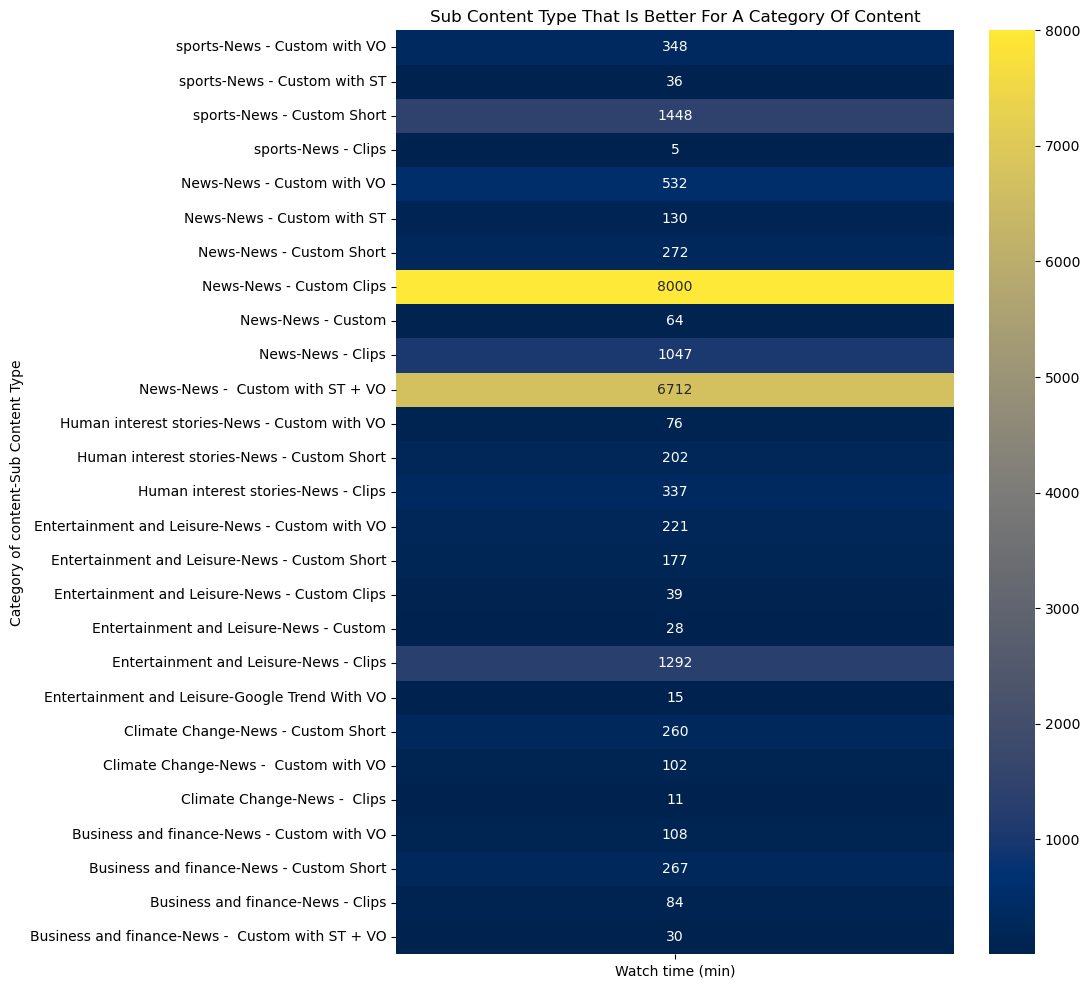

In [19]:
#Plotting pivot table for objective 1
threshold = 8000
pvt_capped = content_best_categorized.clip(upper = threshold)
plt.figure(figsize=(9,12))
sns.heatmap(pvt_capped, annot=True, cmap="cividis",fmt="g")
plt.title("Sub Content Type That Is Better For A Category Of Content");

**Interpretation of Result**

**From the the heatmap above, it can be seen that when "News-custom clips" was classified as "New"
there seem to be a huge difference in viewers watch time than when it was classfied as 
Entertainment and leisure. this simply means that viewer related to it as more of a "news" content 
that an "entertainment and leisure" content and same goes for other comparison.**

**Objective 2**

**Editor that have more engagement**

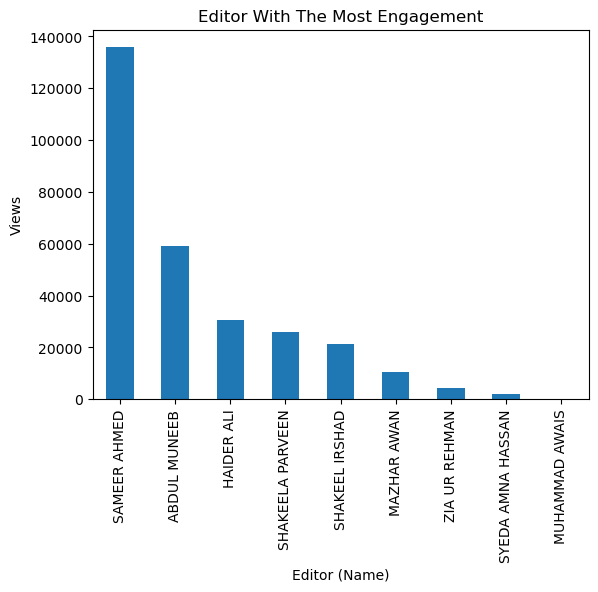

In [20]:
#Plotting pivot table for objective 2
(
    Editor_with_best_performance
    .groupby("Editor (Name)")
    ["Views"].mean()
    .sort_values(ascending=False)
    .plot(
        kind = "bar",
        xlabel = "Editor (Name)",
        ylabel = "Views",
        title = "Editor With The Most Engagement"        
    )
);

**Interpretation of Result**

**From the bar chart above, it can be seen that "Sameer Ahmed" succeeded in getting more engagement
by views on his contents than other editior.**

**Objective 3**

**Editor best for editing specific sub content type**

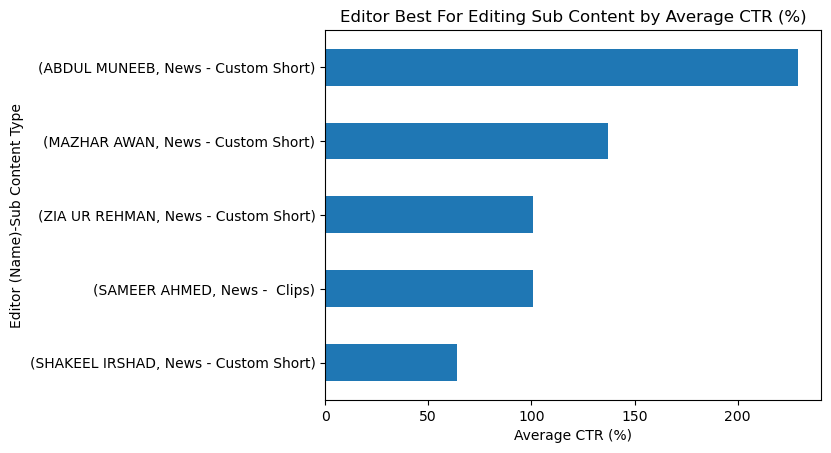

In [21]:
#Plotting pivot table for objective 3
Editor_with_best_sub_content_type.tail().plot(kind="barh")
plt.xlabel("Average CTR (%)")
plt.ylabel("Editor (Name)-Sub Content Type")
plt.title("Editor Best For Editing Sub Content by Average CTR (%)")
plt.gca().get_legend().remove()

**Interpretation of Result**

**When it comes to editor best for editing specific sub content type, using click through rate (CTR) which is
the rate at which viewers click on a content which could be based on visual appearance like the featured image etc.
"Abdul Muneeb" achieved the highest average CTR at over 200% making him best for editing "News-Custom Short"
content.**